<a href="https://colab.research.google.com/github/calebmckay1/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [216]:
def prob_drunk_given_positive(prior_prob_drunk, false_positive_rate, true_positive_rate):
  num = true_positive_rate*prior_prob_drunk
  den = true_positive_rate*prior_prob_drunk + false_positive_rate*(1-prior_prob_drunk)
  prob = num / den
  return prob

prob1 = prob_drunk_given_positive(1/1000,.08,1)
prob1

0.012357884330202669

In [217]:
prob2 = prob_drunk_given_positive(prob1,.08,1)
prob2

0.13525210993291495

In [218]:
prob3 = prob_drunk_given_positive(prob2,.08,1)
prob3

0.6615996951348605

In [219]:
prob4 = prob_drunk_given_positive(prob3,.08,1)
prob4

0.9606895076105054

In [220]:
# just a little more practice with functions here in this cell

def function_name(value1, value2, value3):
  s1 = value3*value1
  s2 = value3*value1 + value2*(1-value1)
  s3 = s1 / s2
  return s3

function_name(1/1000,.08,1)

0.012357884330202669

In [221]:
prior_prob_drunk = 1/1000
true_positive_rate = 1
false_positive_rate = 0.08
not_drunk_prior = 1 - prior_prob_drunk

num = true_positive_rate*prior_prob_drunk

den = true_positive_rate*prior_prob_drunk + false_positive_rate*not_drunk_prior

prob = num/den
print(prob)


0.012357884330202669


In [222]:
prior_prob_drunk = 0.012357884330202669
true_positive_rate = 1
false_positive_rate = 0.08
not_drunk_prior = 1 - prior_prob_drunk

num = true_positive_rate*prior_prob_drunk

den = true_positive_rate*prior_prob_drunk + false_positive_rate*not_drunk_prior

prob = num/den
print(prob)

0.13525210993291495


In [223]:
prior_prob_drunk = 0.13525210993291495
true_positive_rate = 1
false_positive_rate = 0.08
not_drunk_prior = 1 - prior_prob_drunk

num = true_positive_rate*prior_prob_drunk

den = true_positive_rate*prior_prob_drunk + false_positive_rate*not_drunk_prior

prob = num/den
print(prob)

0.6615996951348605


In [224]:
prior_prob_drunk = 0.6615996951348605
true_positive_rate = 1
false_positive_rate = 0.08
not_drunk_prior = 1 - prior_prob_drunk

num = true_positive_rate*prior_prob_drunk

den = true_positive_rate*prior_prob_drunk + false_positive_rate*not_drunk_prior

prob = num/den
print(prob)

# it would take 4 breathyalyzer tests in order for someone to have a probability
# that's greater than 95% for the legal limit.

0.9606895076105054


In [225]:
probabilities = []

prior = 1/1000
true_positive = 1
false_positive = .08

for test in range(1,11):
  prior = prob_drunk_given_positive(prior, false_positive, true_positive)
  probabilities.append(prior) 

probabilities

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192]

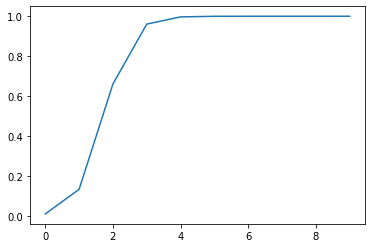

In [226]:
import matplotlib.pyplot as plt

plt.plot(probabilities)
plt.show()

In [0]:
# part 2 of assignment below
#                               |
#                               |
#                             \ | /
#                              \|/

In [0]:
import pandas as pd
import numpy as np
from scipy import stats

column_headers = ['age','workclass','f','education','ed-num','mstatus',
                  'occupation','relationship','race','sex','cap-gain',
                  'cap-loss','hours-week','native-country', 'income']

adf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                  names=column_headers, na_values='?')

male = adf[['sex','hours-week']]

In [0]:
male = male[male['sex'] == ' Male']
male = male.drop('sex', axis=1)

In [230]:
sample = male.sample(500)
sample['hours-week'].mean()

43.768

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [232]:
frequentist = confidence_interval(sample)
frequentist

(42.65966830195487, 43.768, 44.87633169804513)

In [233]:
bayesian, _, _ = stats.bayes_mvs(sample, alpha=.95)
bayesian

Mean(statistic=43.768, minmax=(42.65966830195487, 44.87633169804513))

In [234]:
bayesian[0]

43.768

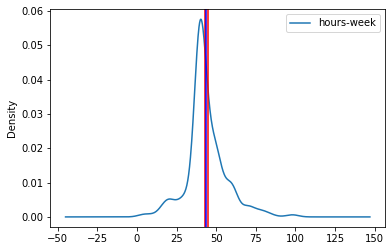

In [235]:
sample.plot.density()
plt.axvline(frequentist[0], color='red')
plt.axvline(frequentist[1], color='blue')
plt.axvline(frequentist[2], color='red')
plt.show()

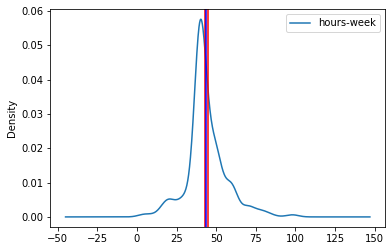

In [236]:
sample.plot.density()
plt.axvline(bayesian.minmax[0], color='red')
plt.axvline(bayesian[0], color='blue')
plt.axvline(bayesian.minmax[1], color='red')
plt.show()

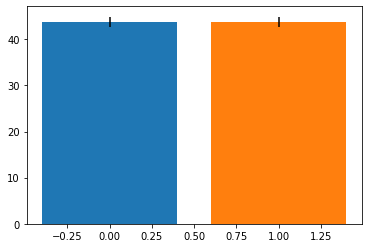

In [237]:
plt.bar(x=0, height=frequentist[1], yerr=(frequentist[2]-frequentist[1]))
plt.bar(x=1, height=bayesian.statistic, yerr=(bayesian.minmax[1]-bayesian.statistic))
plt.show()

well looks pretty good i guess not too sure how exactly everything fits into place like it did, but I think more and more exposure to the syntax and everything, and I'll be able to get it a lot easier, took a long time so far lol.

but basically what the data and graphs show it that the average male who responded to the census worked about 43 hours per week.

In [0]:
# part 3 of assignment below  
#                               |
#                               |
#                             \ | /
#                              \|/

It seems like Bayesian statistics is based more on previous beliefs. Like if i were to assign a probability to flipping a coin, I'd give it 50/50 chance just based on my past beliefs. If I were to assign a probability using Frequentist statistics, I'd take a sample set, and use the statistics from the sample to assign a probability of what I think would happen next.

Frequentist statistics uses sample's mean to predict the population mean.

Bayesian statistics uses a likelihood then uses the samples to make the the likelihood narrower and narrower. Like in part 1 of assignment we started with  1/1000 to be the likelihood then narrowed it down through multiple cells.

Frequentists - probability is due to the frequency of data in a sample
- 50 coin flips, 30 are heads, probability of heads is 60%
- odds of drawing an 'even' number ball in lotto, frequentist would say count the total number of even and odd balls in sample then divide by 2, and thats your probability.

Bayesians use assumptions and can be biased and irrational, and uses a likelihood way of testing.
- assuming the probability of the lotto numbers is 50% without actually testing it.
- it uses prior beliefs and likelihood

in 1st part of assignment we used a prior belief that for every 1000 people driving, one of them is drunk. Then we updated our belief by changing our prior to a new number to get closer to the true value.


Frequentist makes a lot sense but Bayesians still got me a little confused..




In [0]:
########

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!